# Project: 
    Emotion Detection of Text
# Group Members:
    Tayyub Naveed (19P-0108)
    Usman Manzoor (19P-0065)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [2]:
df = pd.read_csv("emotion_dataset.csv")

In [3]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


### Checking emotion frequency in dataset

In [4]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

### Data visulization

<Axes: xlabel='Emotion', ylabel='count'>

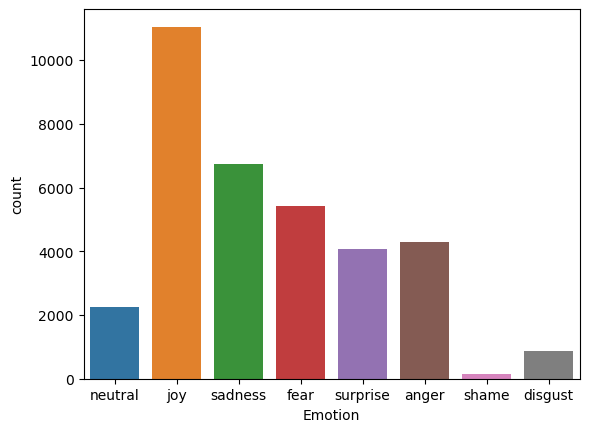

In [5]:
sns.countplot(x='Emotion',data=df)

### Exploration
+ Sentiment Analysis
+ Text Cleaning
+ Keyword Extraction

In [6]:
!pip install textblob

In [7]:
from textblob import TextBlob

In [8]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result = "Positive"
    elif sentiment < 0:
        result = "Negative"
    else:
        result  = "Neutral"
    return result

In [9]:
get_sentiment("I love coding")

'Positive'

### Applying get_sentiment on entire dataset

In [10]:
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [11]:
df.head()

,Emotion,Text,Sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral


### Comparing emotions and sentiments

In [12]:
df.groupby(['Emotion', 'Sentiment']).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1534
          Neutral      1843
          Positive     2033
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

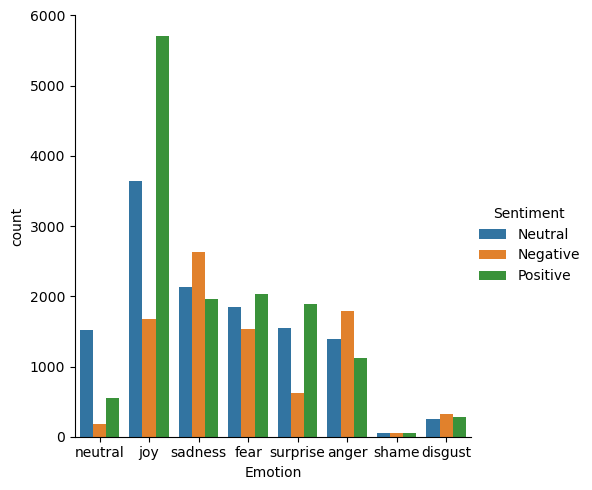

In [41]:
sns.catplot(x='Emotion', hue='Sentiment', data=df,kind='count')

### Text Cleaning
+ Remove noise
    - stopwords
    - special words
    - emojis

In [13]:
import neattext.functions as nfx

In [14]:
df['Text']

0                                                   Why ? 
1          Sage Act upgrade on my to do list for tommorow.
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3         Such an eye ! The true hazel eye-and so brill...
4        @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
                               ...                        
34787    @MichelGW have you gift! Hope you like it! It'...
34788    The world didnt give it to me..so the world MO...
34789                             A man robbed me today . 
34790    Youu call it JEALOUSY, I call it of #Losing YO...
34791    I think about you baby, and I dream about you ...
Name: Text, Length: 34792, dtype: object

In [15]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_stopwords)

In [16]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_punctuations)

In [17]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [18]:
df[['Text', 'Clean_Text']]

,Text,Clean_Text
0,Why ?,Why ?
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow.
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,Such an eye ! The true hazel eye-and so brill...,Such an eye ! The true hazel eye-and so brill...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz for u .! babe naamazed ...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,have you gift! Hope you like it! It's hand m...
34788,The world didnt give it to me..so the world MO...,The world didnt give it to me..so the world MO...
34789,A man robbed me today .,A man robbed me today .
34790,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu call it JEALOUSY, I call it of #Losing YO..."


### Keyword Extraction
+ Extract most commonest words per class of emotion

In [43]:
from collections import Counter

In [44]:
def extract_keywords(text, num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [45]:
emotion_list = df['Emotion'].unique().tolist()

In [46]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [47]:
joy_list = df[df['Emotion']=='joy']['Clean_Text'].tolist()

In [48]:
joy_docx = ''.join(joy_list)

In [50]:
keyword_joy = extract_keywords(joy_docx)

In [51]:
keyword_joy

{'the': 5287,
 'to': 4724,
 'I': 4196,
 'a': 3590,
 'and': 3210,
 'of': 2796,
 'my': 2781,
 'in': 2299,
 '.': 1993,
 'for': 1980,
 'is': 1561,
 ',': 1365,
 'with': 1363,
 'that': 1203,
 'you': 1171,
 'was': 1150,
 'at': 1123,
 'on': 1088,
 'have': 956,
 'me': 947,
 'be': 881,
 'it': 849,
 'this': 758,
 '&amp;': 673,
 'had': 633,
 'all': 604,
 'so': 588,
 'up': 585,
 'day': 577,
 'when': 541,
 'your': 527,
 "I'm": 499,
 'time': 479,
 'from': 476,
 'get': 474,
 'an': 472,
 'not': 469,
 'like': 465,
 'just': 443,
 'about': 434,
 'are': 430,
 'out': 418,
 'The': 410,
 'but': 398,
 'work': 395,
 'Christmas': 388,
 'as': 384,
 'i': 362,
 'When': 361,
 'we': 357}

In [56]:
def plot_most_common_words(mydict):
    df_01=pd.DataFrame(mydict.items(), columns=['token','count'])
    plt.figure(figsize=(20,10))
    sns.barplot(x='token',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()

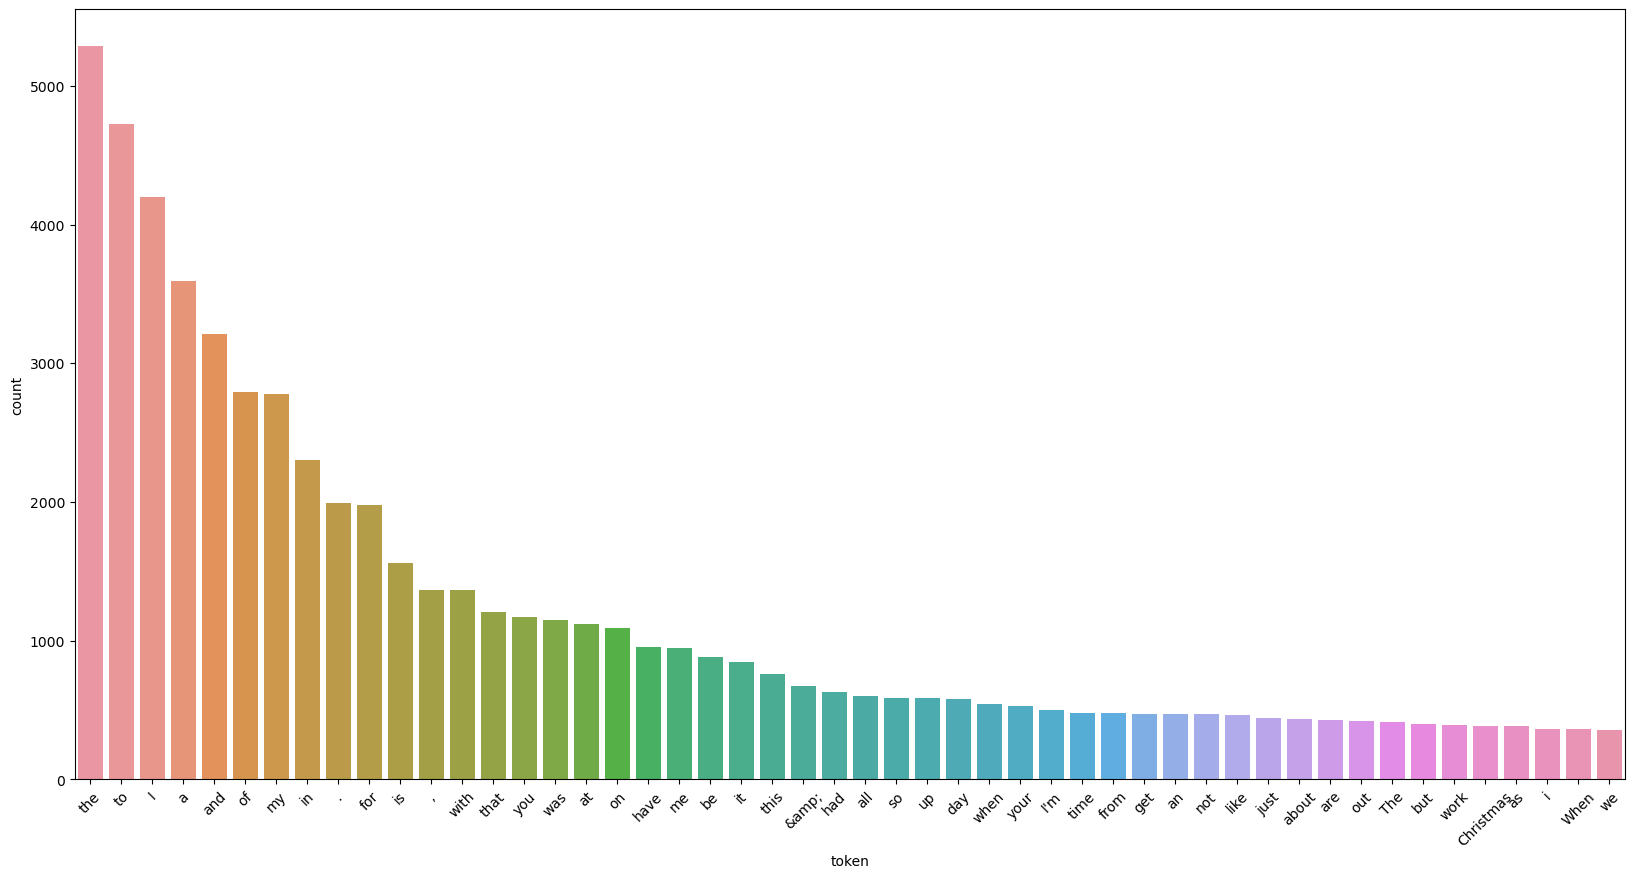

In [57]:
plot_most_common_words(keyword_joy)

In [58]:
surprise_list = df[df['Emotion']=='surprise']['Clean_Text'].tolist()
surprise_docx = ''.join(surprise_list)
keyword_surprise = extract_keywords(surprise_docx)

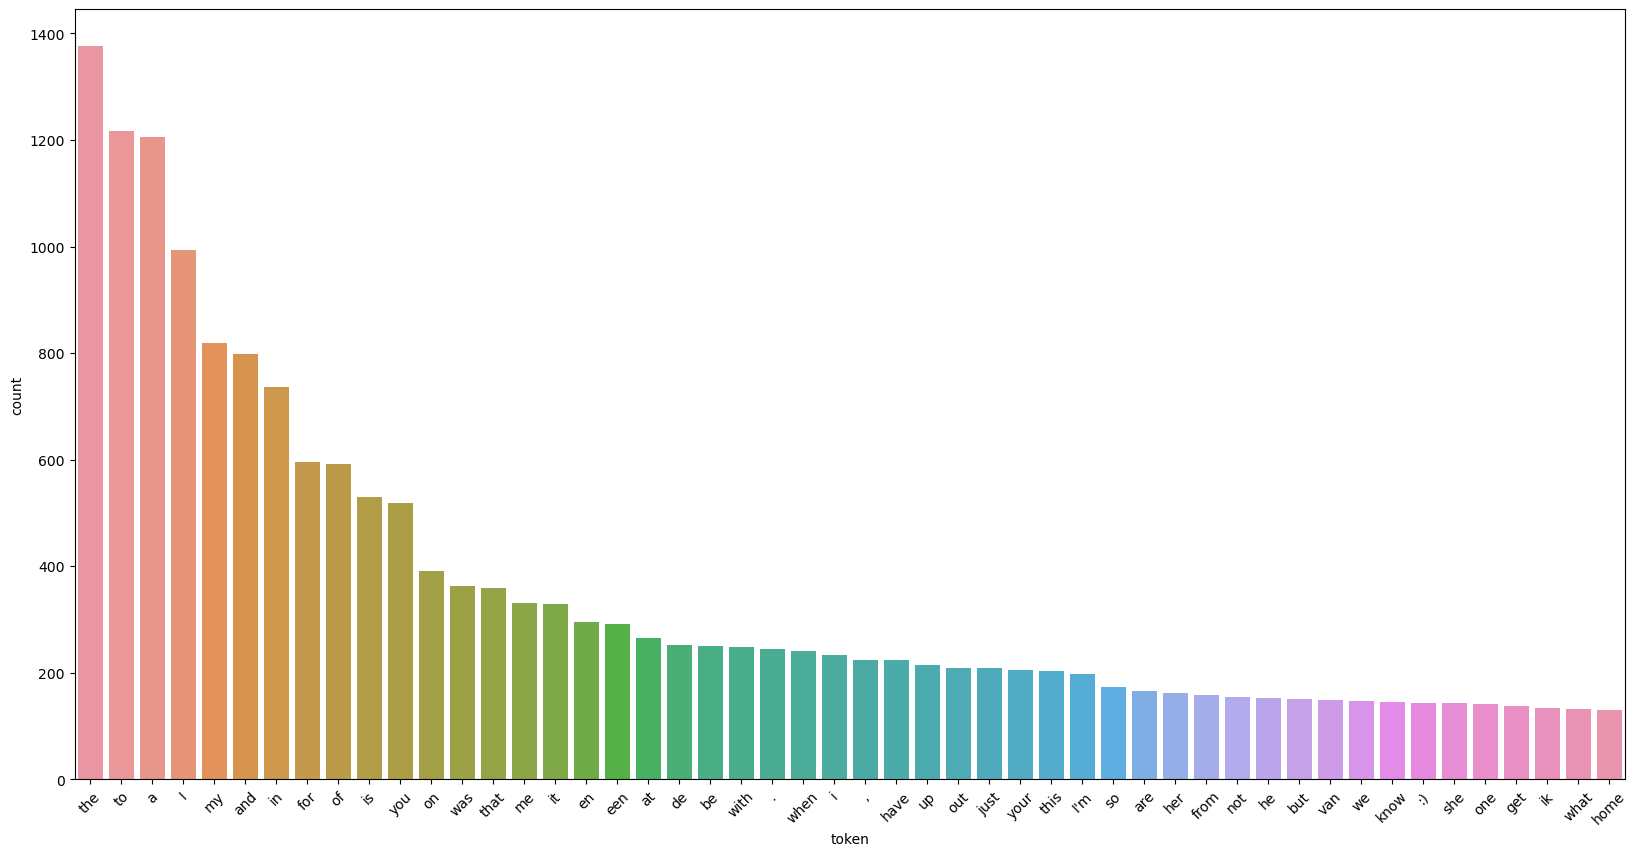

In [59]:
plot_most_common_words(keyword_surprise)

### Build Our Model

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, plot_confusion_matrix

In [20]:
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [21]:
Xfeatures

0                                                   Why ? 
1          Sage Act upgrade on my to do list for tommorow.
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3         Such an eye ! The true hazel eye-and so brill...
4          ugh babe.. hugggzzz for u .!  babe naamazed ...
                               ...                        
34787      have you gift! Hope you like it! It's hand m...
34788    The world didnt give it to me..so the world MO...
34789                             A man robbed me today . 
34790    Youu call it JEALOUSY, I call it of #Losing YO...
34791    I think about you baby, and I dream about you ...
Name: Clean_Text, Length: 34792, dtype: object

In [22]:
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42)

In [24]:
nv_model = MultinomialNB()
nv_model.fit(x_train, y_train)

MultinomialNB()

### Accuracy

In [25]:
nv_model.score(x_test, y_test)

0.5643801494539183

### Predictions

In [26]:
y_pred_for_nv = nv_model.predict(x_test)

In [27]:
y_pred_for_nv

array(['fear', 'sadness', 'sadness', ..., 'sadness', 'joy', 'sadness'],
      dtype='<U8')

### Make a single prediction


In [63]:
sample_text = ["I love coding so much"]

In [64]:
vect = cv.transform(sample_text).toarray()

In [65]:
nv_model.predict(vect)

array(['joy'], dtype='<U8')

### Confidence

In [31]:
nv_model.predict_proba(vect)

array([[9.21558415e-03, 2.84856942e-04, 7.17832690e-02, 7.27387611e-01,
        4.84644528e-03, 1.47029739e-01, 5.61813250e-07, 3.94519332e-02]])

In [32]:
nv_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [33]:
np.max(nv_model.predict_proba(vect))

0.7273876106120176

In [34]:
def predict_emotion(sample_text, model):
    myvect = cv.transform(sample_text).toarray()
    prediction = model.predict(myvect)
    pred_proba = model.predict_proba(myvect)
    pred_percentage_for_all = dict(zip(model.classes_, pred_proba[0]))
    print("Prediction:{}, Prediction Score:{}".format(prediction[0],np.max(pred_proba)))
    return pred_percentage_for_all

In [35]:
predict_emotion(sample_text, nv_model)

Prediction:joy, Prediction Score:0.7273876106120176


{'anger': 0.009215584151633269,
 'disgust': 0.0002848569422544623,
 'fear': 0.07178326900215977,
 'joy': 0.7273876106120176,
 'neutral': 0.004846445281418173,
 'sadness': 0.1470297389590574,
 'shame': 5.618132504642586e-07,
 'surprise': 0.03945193323820767}

### model evaluation

In [36]:
print(classification_report(y_test, y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.64      0.50      0.56      1283
     disgust       0.32      0.02      0.04       292
        fear       0.73      0.57      0.64      1645
         joy       0.52      0.86      0.65      3311
     neutral       0.75      0.10      0.18       675
     sadness       0.53      0.54      0.54      2015
       shame       0.00      0.00      0.00        36
    surprise       0.60      0.25      0.35      1181

    accuracy                           0.56     10438
   macro avg       0.51      0.36      0.37     10438
weighted avg       0.59      0.56      0.53     10438



In [37]:
confusion_matrix(y_test, y_pred_for_nv)

array([[ 644,    1,   62,  354,    2,  206,    0,   14],
       [  38,    6,   27,  141,    0,   74,    0,    6],
       [  78,    3,  936,  371,    6,  175,    1,   75],
       [  67,    3,  104, 2849,    9,  213,    0,   66],
       [  22,    0,   19,  424,   69,  138,    0,    3],
       [  99,    2,   67,  714,    3, 1093,    2,   35],
       [  10,    0,    8,   11,    0,    7,    0,    0],
       [  49,    4,   51,  624,    3,  155,    1,  294]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


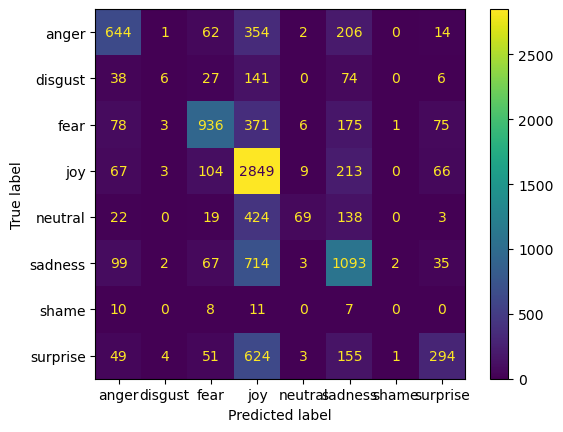

In [38]:
plot_confusion_matrix(nv_model, x_test, y_test)